In [25]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision.models import resnet50, vgg16, resnet18, resnet34

In [2]:
torch.cuda.is_available()

True

In [30]:
train_dir = './dataset/ICIAR2018_BACH_Challenge/Photos/generator/Train/'
test_dir = './dataset/ICIAR2018_BACH_Challenge/Photos/generator/Test/'
pred_dir = './dataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/'

Img_Size = 299
Batch_Size = 8

lr = 0.0003
num_epochs = 100

In [4]:
transform = transforms.Compose(
    [transforms.Resize(Img_Size),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root=train_dir,
                                            transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=Batch_Size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root=test_dir,
                                           transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=Batch_Size,
                                         shuffle=True, num_workers=2)

classes = ('Invasive', 'InSitu', 'Normal', 'Benign')

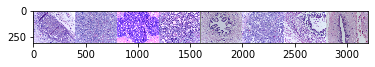

Invasive Normal Invasive Normal Benign InSitu InSitu Benign


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(Batch_Size)))

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
def resnet50_model(pre_trained, lr):
    model = resnet50(pretrained=pre_trained)
        
    # Set layer trainable tp False
#     for param in model.parameters():
#         param.requires_grad = False

    model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Linear(512, 4),
                                 nn.Softmax())
    return model

In [39]:
model = resnet50_model(True, lr)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

total_params = sum(p.numel() for p in model.parameters())
trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total Parameters:", total_params)
print("Total Trainable Parameters:", trainable_parameters)

Total Parameters: 24559172
Total Trainable Parameters: 24559172


In [42]:
# print(model.to(device))

In [43]:
costs = []
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
#         outputs = net(inputs)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Append cost
        costs.append(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print('[%d, %3d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,  10] loss: 1.363226
[1,  20] loss: 1.208464
[1,  30] loss: 1.266115
[1,  40] loss: 1.127755
[2,  10] loss: 1.183896
[2,  20] loss: 1.229110
[2,  30] loss: 1.233510
[2,  40] loss: 1.271870
[3,  10] loss: 1.256260
[3,  20] loss: 1.177122
[3,  30] loss: 1.163810
[3,  40] loss: 1.210735
[4,  10] loss: 1.318207
[4,  20] loss: 1.196702
[4,  30] loss: 1.186210
[4,  40] loss: 1.297373
[5,  10] loss: 1.192093
[5,  20] loss: 1.165110
[5,  30] loss: 1.279924
[5,  40] loss: 1.355412
[6,  10] loss: 1.184865
[6,  20] loss: 1.222253
[6,  30] loss: 1.358817
[6,  40] loss: 1.158398
[7,  10] loss: 1.243412
[7,  20] loss: 1.184081
[7,  30] loss: 1.321410
[7,  40] loss: 1.197805
[8,  10] loss: 1.249193
[8,  20] loss: 1.226565
[8,  30] loss: 1.289741
[8,  40] loss: 1.186493
[9,  10] loss: 1.221981
[9,  20] loss: 1.105276
[9,  30] loss: 1.217577
[9,  40] loss: 1.299873
[10,  10] loss: 1.272551
[10,  20] loss: 1.186452
[10,  30] loss: 1.274192
[10,  40] loss: 1.245580
[11,  10] loss: 1.197916
[11,  20] l

[83,  30] loss: 0.769796
[83,  40] loss: 0.768464
[84,  10] loss: 0.771558
[84,  20] loss: 0.775376
[84,  30] loss: 0.789870
[84,  40] loss: 0.781207
[85,  10] loss: 0.768697
[85,  20] loss: 0.804349
[85,  30] loss: 0.777606
[85,  40] loss: 0.842641
[86,  10] loss: 0.805994
[86,  20] loss: 0.754839
[86,  30] loss: 0.857862
[86,  40] loss: 0.861614
[87,  10] loss: 0.783247
[87,  20] loss: 0.784667
[87,  30] loss: 0.835061
[87,  40] loss: 0.822036
[88,  10] loss: 0.797105
[88,  20] loss: 0.824227
[88,  30] loss: 0.832663
[88,  40] loss: 0.809012
[89,  10] loss: 0.811960
[89,  20] loss: 0.796538
[89,  30] loss: 0.815866
[89,  40] loss: 0.862288
[90,  10] loss: 0.838764
[90,  20] loss: 0.823565
[90,  30] loss: 0.797071
[90,  40] loss: 0.827641
[91,  10] loss: 0.799061
[91,  20] loss: 0.825495
[91,  30] loss: 0.822313
[91,  40] loss: 0.804593
[92,  10] loss: 0.779409
[92,  20] loss: 0.804983
[92,  30] loss: 0.804322
[92,  40] loss: 0.782350
[93,  10] loss: 0.787381
[93,  20] loss: 0.757092


In [10]:
# model.load_state_dict(torch.load('./py_model.pth'))

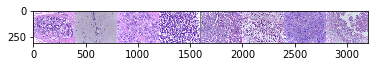

GroundTruth:  Benign Invasive Invasive Normal Normal InSitu Normal InSitu


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(Batch_Size)))

In [12]:
images = images.to(device)
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(Batch_Size)))

Predicted:  Benign Benign Invasive Normal InSitu InSitu Normal InSitu


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        print(predicted, labels)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 80 test images: %d %%' % (
    100 * correct / total))

tensor([1, 0, 3, 0, 0, 3, 1, 2], device='cuda:0') tensor([2, 0, 3, 2, 0, 2, 2, 2], device='cuda:0')
tensor([1, 3, 0, 0, 1, 0, 2, 3], device='cuda:0') tensor([1, 3, 0, 0, 1, 2, 2, 3], device='cuda:0')
tensor([3, 1, 1, 1, 3, 1, 0, 0], device='cuda:0') tensor([3, 1, 1, 1, 0, 1, 0, 0], device='cuda:0')
tensor([1, 3, 0, 0, 2, 3, 3, 1], device='cuda:0') tensor([1, 3, 0, 0, 2, 3, 3, 2], device='cuda:0')
tensor([3, 0, 3, 1, 1, 3, 2, 0], device='cuda:0') tensor([3, 1, 3, 1, 1, 3, 2, 0], device='cuda:0')
Accuracy of the network on the 80 test images: 80 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(4):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Invasive : 66 %
Accuracy of InSitu : 75 %
Accuracy of Normal : 20 %
Accuracy of Benign : 100 %


In [15]:
PATH = './py_model.pth'
torch.save(model.state_dict(), PATH)

In [16]:
# import os
# from PIL import Image
# import torch.nn.functional as F
# from torch.autograd import Variable

# preds = []

# for img_name in os.listdir(pred_dir):
#     imagepath = os.path.join(pred_dir, img_name)
#     image = Image.open(imagepath).convert('RGB')
#     img = transform(image)
#     img.unsqueeze_(dim=0)
#     img = Variable(img)
#     torch.no_grad()
#     img = img.to(device)
#     predict = F.softmax(model(img))
#     preds.append(torch.argmax(predict))
# print(preds)

In [17]:
def plot_costs(costs):
    %matplotlib inline
    loss = costs
    epochs=range(len(loss)) 

    plt.plot(epochs, loss, 'r', "Training Loss")
    plt.title('Training Loss')
    plt.figure()
    return

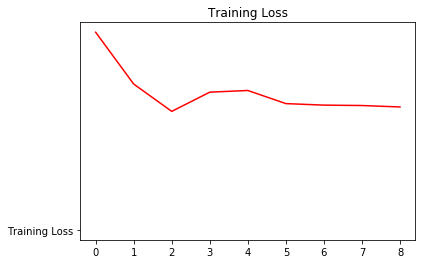

<Figure size 432x288 with 0 Axes>

In [18]:
plot_costs(costs[::500])

In [26]:
def create_csv_file(preds):
    with open('pred.cvs', 'w+') as file:
        file.write('case,class\n')
        for idx, pred in enumerate(preds):
            file.write(str(idx) + ',' + str(pred) + '\n')
    ZipObj = zipfile.ZipFile('predictions.zip', 'w')
    ZipObj.write('pred.cvs')
    print("File predictions.zip created successfully.")
    return

In [27]:
if os.path.exists('./predictions.zip'):
    !rm -rf predictions.zip
    print("Previous Predictions.zip has been removed.")

In [29]:
# create_csv_file(preds)